# Activity 10 - More on Text Analytics

In this notebook we give a simplified version of how next word prediction can be performed. This is the core of how larger and more complex models perform, such as GPT, when trained on highly diverse and rich text datasets.

In [1]:
### Here are the imports that you will require
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
def load_data():
    # the data is a standard pcap packet capture file (saved as a csv output)
    file_name = './data/movie_lines.txt'
    # this will then put the csv data into a pandas dataframe
    #data = pd.read_csv(file_name, sep='+++$+++')
    lines = []
    with open(file_name, 'r', encoding='utf-8', errors="replace") as f:
        for line in f:
            line = line.split(" +++$+++ ")
            line[4] = line[4].split('\n')[0]
            lines.append(line)
    data = pd.DataFrame.from_records(lines, columns=['ID1', 'ID2', 'ID3', 'ID4', 'Text'])
    return data


In [2]:
data = load_data()
data

,ID1,ID2,ID3,ID4,Text
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.
...,...,...,...,...,...
304708,L666371,u9030,m616,DURNFORD,Lord Chelmsford seems to want me to stay back ...
304709,L666370,u9034,m616,VEREKER,I'm to take the Sikali with the main column to...
304710,L666369,u9030,m616,DURNFORD,"Your orders, Mr Vereker?"
304711,L666257,u9030,m616,DURNFORD,"Good ones, yes, Mr Vereker. Gentlemen who can ..."


In [3]:
large_data_string = ' '.join(data['Text'].values) 
large_data_string = large_data_string.replace(".", " ")
large_data_string = large_data_string.replace(",", " ")
large_data_string = large_data_string.replace("-", " ")
large_data_string = large_data_string.replace("--", " ")
large_data_string = large_data_string.replace("!", " ")
large_data_string = large_data_string.replace("?", " ")

In [4]:
# this will output the full string
# large_data_string 

In [5]:
print (len(large_data_string)) # this is the number of characters in the string

17147986


In [6]:
large_data = large_data_string.split(" ") # we split by the space to create an array of words
ld = []
for i in large_data:
    if len(i) > 1:
        ld.append(i)
#ld

Below we are now processing the text to have a sequence of words, which we will use to train our ML model.

In [7]:
val1 = 0
val2 = 5
ld_matrix = []
for i in range(len(ld)):
    ld_matrix.append(ld[val1:val2])
    val1 = val1+1
    val2 = val2+1
ld_matrix

[['They', 'do', 'not', 'They', 'do'],
 ['do', 'not', 'They', 'do', 'to'],
 ['not', 'They', 'do', 'to', 'hope'],
 ['They', 'do', 'to', 'hope', 'so'],
 ['do', 'to', 'hope', 'so', 'She'],
 ['to', 'hope', 'so', 'She', 'okay'],
 ['hope', 'so', 'She', 'okay', "Let's"],
 ['so', 'She', 'okay', "Let's", 'go'],
 ['She', 'okay', "Let's", 'go', 'Wow'],
 ['okay', "Let's", 'go', 'Wow', 'Okay'],
 ["Let's", 'go', 'Wow', 'Okay', "you're"],
 ['go', 'Wow', 'Okay', "you're", 'gonna'],
 ['Wow', 'Okay', "you're", 'gonna', 'need'],
 ['Okay', "you're", 'gonna', 'need', 'to'],
 ["you're", 'gonna', 'need', 'to', 'learn'],
 ['gonna', 'need', 'to', 'learn', 'how'],
 ['need', 'to', 'learn', 'how', 'to'],
 ['to', 'learn', 'how', 'to', 'lie'],
 ['learn', 'how', 'to', 'lie', 'No'],
 ['how', 'to', 'lie', 'No', "I'm"],
 ['to', 'lie', 'No', "I'm", 'kidding'],
 ['lie', 'No', "I'm", 'kidding', 'You'],
 ['No', "I'm", 'kidding', 'You', 'know'],
 ["I'm", 'kidding', 'You', 'know', 'how'],
 ['kidding', 'You', 'know', 'how', 's

In [8]:
ld

['They',
 'do',
 'not',
 'They',
 'do',
 'to',
 'hope',
 'so',
 'She',
 'okay',
 "Let's",
 'go',
 'Wow',
 'Okay',
 "you're",
 'gonna',
 'need',
 'to',
 'learn',
 'how',
 'to',
 'lie',
 'No',
 "I'm",
 'kidding',
 'You',
 'know',
 'how',
 'sometimes',
 'you',
 'just',
 'become',
 'this',
 '"persona"',
 'And',
 'you',
 "don't",
 'know',
 'how',
 'to',
 'quit',
 'Like',
 'my',
 'fear',
 'of',
 'wearing',
 'pastels',
 'The',
 '"real',
 'you"',
 'What',
 'good',
 'stuff',
 'figured',
 "you'd",
 'get',
 'to',
 'the',
 'good',
 'stuff',
 'eventually',
 'Thank',
 'God',
 'If',
 'had',
 'to',
 'hear',
 'one',
 'more',
 'story',
 'about',
 'your',
 'coiffure',
 'Me',
 'This',
 'endless',
 'blonde',
 'babble',
 "I'm",
 'like',
 'boring',
 'myself',
 'What',
 'crap',
 'do',
 'you',
 'listen',
 'to',
 'this',
 'crap',
 'No',
 'Then',
 'Guillermo',
 'says',
 '"If',
 'you',
 'go',
 'any',
 'lighter',
 "you're",
 'gonna',
 'look',
 'like',
 'an',
 'extra',
 'on',
 '90210',
 'You',
 'always',
 'been',
 

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ld_labels = le.fit_transform(ld)

In [10]:
len(ld_labels)

3020266

In [11]:
len(ld)

3020266

In [12]:
ld_labels

array([34392, 47997, 61203, ..., 40874, 68484, 26595], dtype=int64)

In [13]:
val1 = 0
val2 = 5
ld_labels = list(ld_labels)
ld_label_matrix = []
for i in range(len(ld_labels)):
    ld_label_matrix.append(np.array(ld_labels[val1:val2]))
    val1 = val1+1
    val2 = val2+1

In [14]:
val1 = 0
val2 = 5
ld_labels = list(ld_labels)
ld_label_matrix = []

for i in range(len(ld_labels)):
    slice_ = ld_labels[val1:val2]
    if len(slice_) < 5:
        slice_ += [None] * (5 - len(slice_))  # Pad with None (or 0)
    ld_label_matrix.append(np.array(slice_))
    val1 += 1
    val2 += 1

ld_label_matrix = np.array(ld_label_matrix)
ld_label_matrix


array([[34392, 47997, 61203, 34392, 47997],
       [47997, 61203, 34392, 47997, 73639],
       [61203, 34392, 47997, 73639, 54483],
       ...,
       [40874, 68484, 26595, None, None],
       [68484, 26595, None, None, None],
       [26595, None, None, None, None]], dtype=object)

In [15]:
ld_label_matrix = np.array(ld_label_matrix)
ld_label_matrix

array([[34392, 47997, 61203, 34392, 47997],
       [47997, 61203, 34392, 47997, 73639],
       [61203, 34392, 47997, 73639, 54483],
       ...,
       [40874, 68484, 26595, None, None],
       [68484, 26595, None, None, None],
       [26595, None, None, None, None]], dtype=object)

In [16]:
ld_label_matrix

array([[34392, 47997, 61203, 34392, 47997],
       [47997, 61203, 34392, 47997, 73639],
       [61203, 34392, 47997, 73639, 54483],
       ...,
       [40874, 68484, 26595, None, None],
       [68484, 26595, None, None, None],
       [26595, None, None, None, None]], dtype=object)

# Draw a Word Cloud

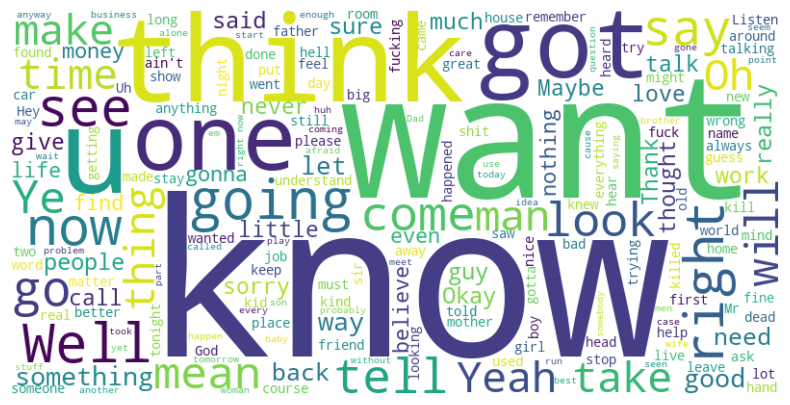

In [17]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example array of words
# ld = ["data", "science", "python", "AI", "machine learning", "data", "AI", "deep learning", 
#       "neural network", "data", "science", "AI", "natural language processing", "data", "AI"]

# Convert the list to a single string for WordCloud generation
text = " ".join(ld)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()